In [1]:
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/objFuncs --break-system-packages
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/pyBO --break-system-packages

In [2]:
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/objFuncs
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/pyBO

In [3]:
# !pip install -e ../../objFuncs
# !pip install -e ../../pyBO

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import objFuncs 
from objFuncs import VM
from objFuncs import residuals
from objFuncs.util import plot_obj_history

objFuncs version: 1.1.0. updated on 2023-12-04


In [6]:
def test_fun(x):
    y = np.ones(3)
    y[:2] = x - 0.2
    y[2] = np.mean(x) - 0.2
    return y

In [7]:
vm = VM(
        x0 = np.zeros(2),
        fun = test_fun,
        decision_CSETs=['FE_LEBT:PSC2_D0948:I_CSET', 'FE_LEBT:PSC1_D0948:I_CSET',
                        ],
        objective_RDs = [ 
            'FE_MEBT:BPM_D1056:XPOS_RD',
            'FE_MEBT:BPM_D1056:YPOS_RD',
            'FE_MEBT:BPM_D1056:PHASE_RD'],
        )

In [8]:
objFuncs._global_machineIO.fetch_data = vm.fetch_data
objFuncs._global_machineIO.ensure_set = vm.ensure_set
objFuncs._global_machineIO._test = True

In [9]:
res = residuals.residualObj(  
    decision_CSETs=['FE_LEBT:PSC2_D0948:I_CSET', 'FE_LEBT:PSC1_D0948:I_CSET',
                   ],
    decision_min= [-3,-3, ],
    decision_max= [ 3, 3, ],
    objective_goal = { 
            'FE_MEBT:BPM_D1056:XPOS_RD' : 0.0,     #(mm)
            'FE_MEBT:BPM_D1056:YPOS_RD' : 0.0, 
            'FE_MEBT:BPM_D1056:PHASE_RD': 0.0, 
            },
    objective_norm = { 
            'FE_MEBT:BPM_D1056:XPOS_RD' : 1.,     
            'FE_MEBT:BPM_D1056:YPOS_RD' : 1.,     
            'FE_MEBT:BPM_D1056:PHASE_RD': 2., 
            },
    objective_weight = { 
            'FE_MEBT:BPM_D1056:XPOS_RD' : 2.,     
            'FE_MEBT:BPM_D1056:YPOS_RD' : 2.,     
            'FE_MEBT:BPM_D1056:PHASE_RD': 1., 
            },
    )

======== class info ========
init_time: 2023-12-15 10:40:12.084039
class_hierarchy: [
    residualObj, objFuncBase]
machineIO: <objFuncs.construct_machineIO.construct_machineIO object at 0x7fe18055f2b0>
decision_CSETs: [
    FE_LEBT:PSC2_D0948:I_CSET, FE_LEBT:PSC1_D0948:I_CSET]
decision_min: [-3. -3.]
decision_max: [3. 3.]
decision_bounds: [[-3  3]
 [-3  3]]
decision_RDs: [
    FE_LEBT:PSC2_D0948:I_RD, FE_LEBT:PSC1_D0948:I_RD]
decision_tols: None
decision_couplings: None
history_buffer_size: None
logging_frequency: inf
logging_tag: 
logging_fname: None
x0: [
    0.0, 0.0]
objective_goal:
    FE_MEBT:BPM_D1056:XPOS_RD: 0.0
    FE_MEBT:BPM_D1056:YPOS_RD: 0.0
    FE_MEBT:BPM_D1056:PHASE_RD: 0.0
objective_norm:
    FE_MEBT:BPM_D1056:XPOS_RD: 1.0
    FE_MEBT:BPM_D1056:YPOS_RD: 1.0
    FE_MEBT:BPM_D1056:PHASE_RD: 2.0
objective_weight:
    FE_MEBT:BPM_D1056:XPOS_RD: 2.0
    FE_MEBT:BPM_D1056:YPOS_RD: 2.0
    FE_MEBT:BPM_D1056:PHASE_RD: 1.0
objective_RDs: [
    FE_MEBT:BPM_D1056:XPOS_RD, FE_ME

In [10]:
res.x0

[0.0, 0.0]

In [11]:
x = np.array(res.history['decision_CSETs']['values'])
y = np.array(res.history['objectives']['values'])
x,y

(array([], dtype=float64), array([], dtype=float64))

In [12]:
plot_decision = plot_obj_history(
            res.history['decision_CSETs'],
#             fig=fig,ax=ax[0],hdisplay=hdisplay
            )

plot_RDs = plot_obj_history(
            res.history['objective_RDs'],
            keys=[  ['FE_MEBT:BPM_D1056:XPOS_RD','FE_MEBT:BPM_D1056:YPOS_RD'],
                    ['FE_MEBT:BPM_D1056:PHASE_RD'],
                 ],
#             fig=fig,ax=ax[0],hdisplay=hdisplay
            )
plot_objs = plot_obj_history(
            res.history['objectives'],
            keys=[  ['FE_MEBT:BPM_D1056:XPOS_RD','FE_MEBT:BPM_D1056:YPOS_RD'],
                    ['FE_MEBT:BPM_D1056:PHASE_RD'],
                 ],
#             fig=fig,ax=ax[1],hdisplay=hdisplay
            )
callbacks = [plot_decision,plot_RDs,plot_objs]

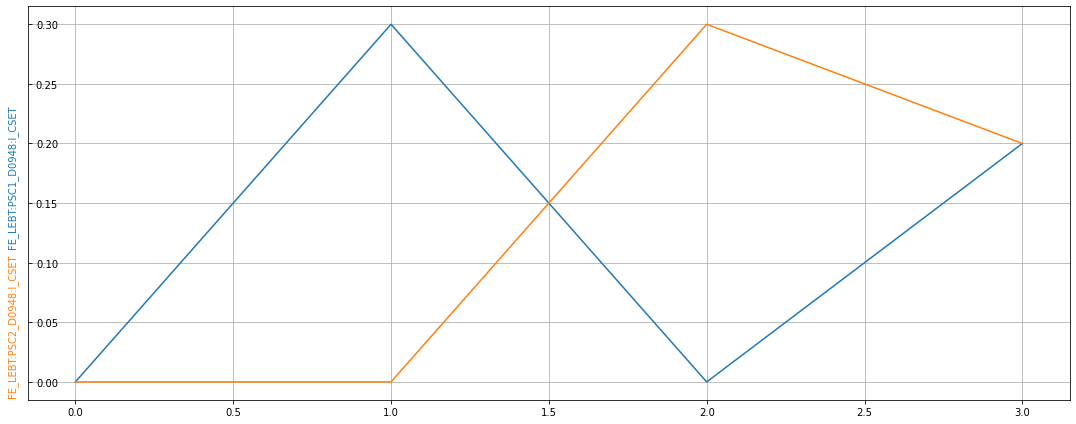

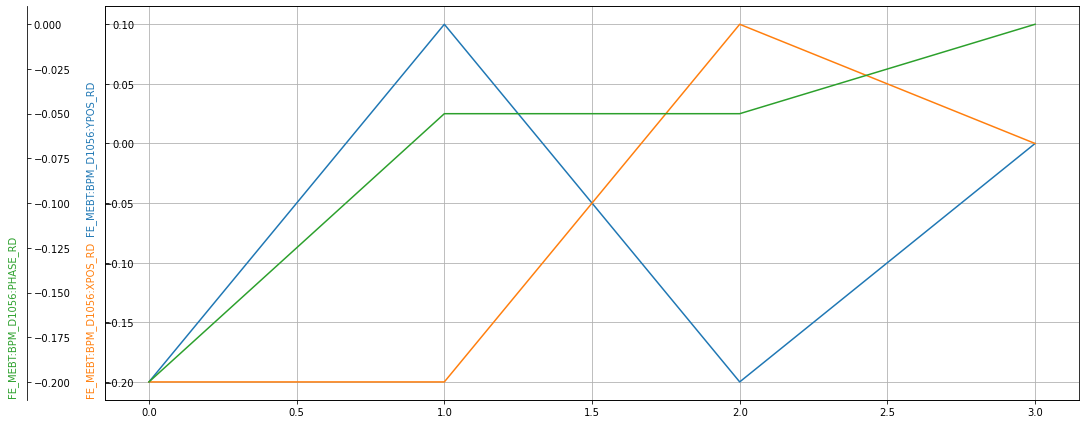

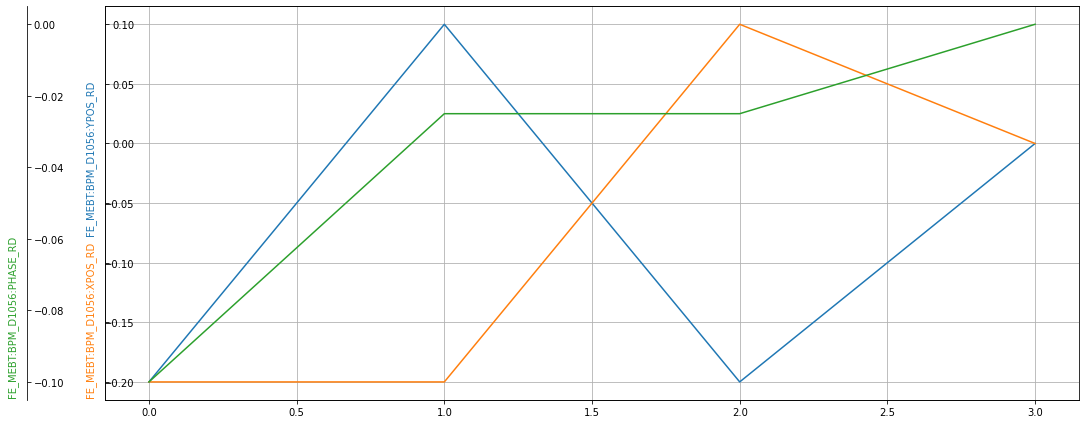

In [13]:
result = res.lsq_linear(jac_use3points=False,callbacks=callbacks)
for f in callbacks:
    f.close()

In [14]:
result.x

array([0.2, 0.2])

In [15]:
pd.DataFrame(res.history['jacobian']['values'], columns=res.history['jacobian']['names'])

,d FE_MEBT:BPM_D1056:XPOS_RD/d FE_LEBT:PSC2_D0948:I_CSET,d FE_MEBT:BPM_D1056:XPOS_RD/d FE_LEBT:PSC1_D0948:I_CSET,d FE_MEBT:BPM_D1056:YPOS_RD/d FE_LEBT:PSC2_D0948:I_CSET,d FE_MEBT:BPM_D1056:YPOS_RD/d FE_LEBT:PSC1_D0948:I_CSET,d FE_MEBT:BPM_D1056:PHASE_RD/d FE_LEBT:PSC2_D0948:I_CSET,d FE_MEBT:BPM_D1056:PHASE_RD/d FE_LEBT:PSC1_D0948:I_CSET
0,1.2,0.0,0.0,1.2,0.15,0.15
